In [2]:
import numpy as np                                                 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt                                    
import seaborn as sns                                             
%matplotlib inline
sns.set()
from datetime import datetime

import pyodbc
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [3]:
def get_dataframe_from_csv(filename):
    dataset = pd.read_csv(filename)
    return dataset


In [4]:
dataset = get_dataframe_from_csv("/home/forhad/Study/Self_Work/XXX/dataset_trvg_case-2.csv")
dataset['date_ymd'] = dataset['date_ymd'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
dataset

,date_ymd,time_to_travel_grouping,length_of_stay_grouping,platform_country_code,adv_id,clicks,bookings,booking_rev_EURcent,cost_EURcent
0,2020-07-29,8,1,FI,345,22,0,0,51
1,2020-04-28,41,13,US,64,5,0,0,146
2,2020-08-10,2,1,IL,64,351,5,103666,3474
3,2020-08-24,8,15,TR,139,8,0,0,48
4,2020-09-10,2,13,HK,56,7,0,0,73
...,...,...,...,...,...,...,...,...,...
1008213,2020-04-15,41,8,HU,56,9,0,0,8
1008214,2020-10-22,29,2,TW,56,53,2,25779,666
1008215,2020-12-07,15,8,ZA,56,5,0,0,44
1008216,2020-06-16,301,4,CH,56,2,0,0,3


From the US only, adv_id 58, 64 and 7 are the largest advertisers in the US. The rest of the advertisers can improve their advertisement campaigns by offering promotional offer, offer discounted packages targeting off seasonal traveling groups. Advertisement should increases in those locale where revenue generate ratio compare to low with other locale. 

<AxesSubplot:ylabel='None'>

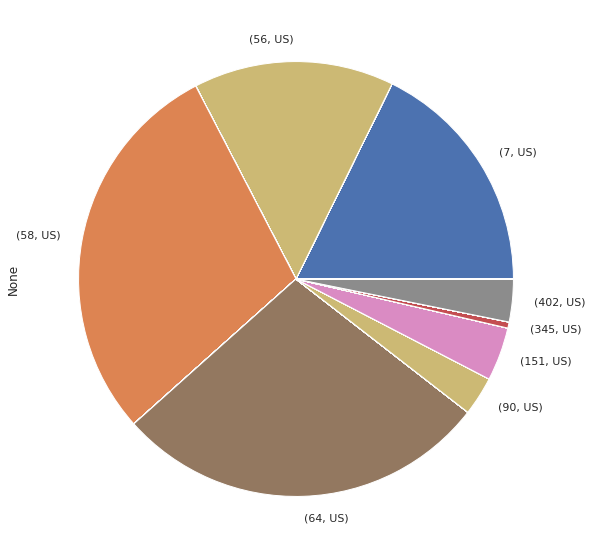

In [26]:
top_adv = dataset.groupby(
    [ 'adv_id','platform_country_code']).apply(lambda x: x[x['platform_country_code'] == 'US' ]['clicks'].sum())
top_adv.plot(kind='pie', figsize=(16,10))